<h1>Chapter 06. Decision Trees</h1>

**Decision Trees**: A predictive modeling technique that recursively partitions data into smaller subsets based on feature values, forming a tree-like structure to make decisions and predict outcomes for classification or regression tasks.

<h2>Training and Visualizing a Decision Tree</h2>

`DecisionTreeClassifier` in scikit-learn is a classification algorithm based on decision trees. It recursively splits data to predict class labels, accommodating non-linear patterns. Hyperparameters like `max_depth` manage complexity, and each leaf node predicts the most prevalent class in its instances.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Limit the decision tree's maximum depth to 2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Visualization of the teached Decision Tree

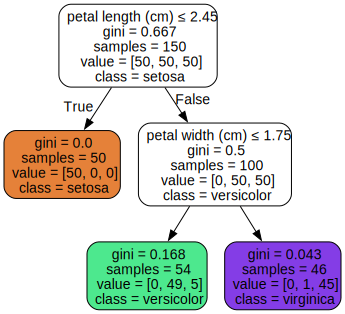

In [2]:
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    special_characters=True,
)
display(Source(dot_data))

<h2>Making Predictions</h2>

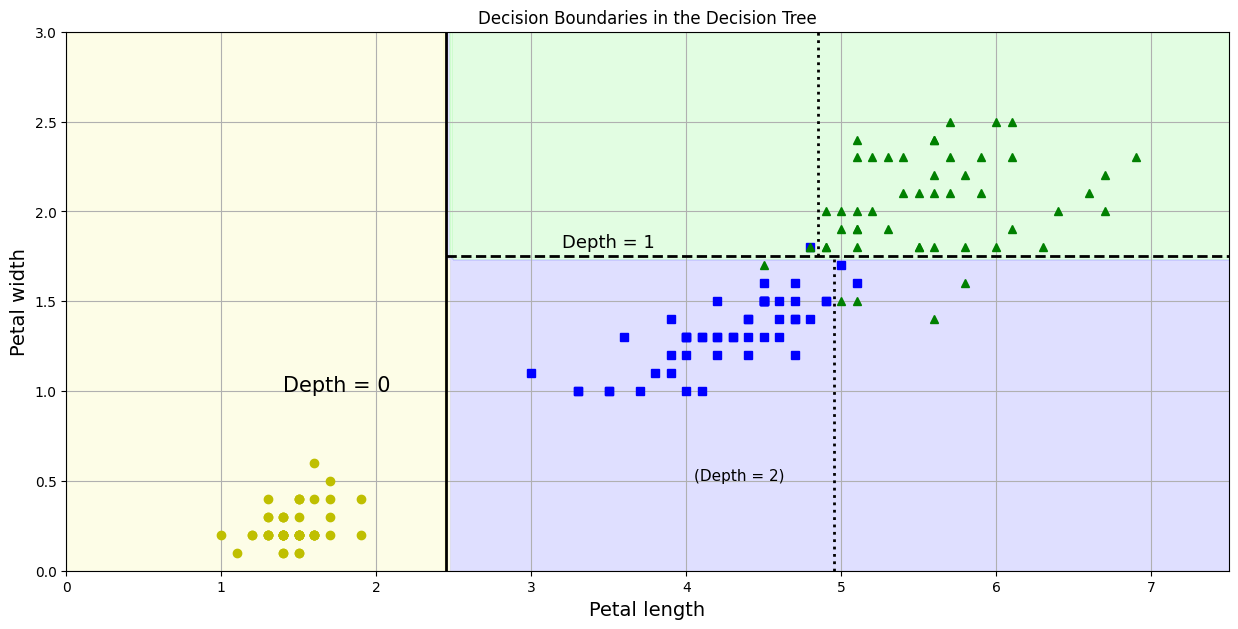

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.3)
    if legend:
        plt.legend(loc='lower right', fontsize=14)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    plt.grid(True)


plt.figure(figsize=(15, 7))
plot_decision_boundary(clf=tree_clf, X=X, y=y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'Depth = 0', fontsize=15)
plt.text(3.2, 1.8, 'Depth = 1', fontsize=13)
plt.text(4.05, 0.5, '(Depth = 2)', fontsize=11)
plt.title('Decision Boundaries in the Decision Tree')
plt.grid(True)
plt.show()

<h2>Estimating Class Probabilities</h2>

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

<h2>Regularization Hyperparameters</h2>

Regularization hyperparameters in Decision Trees control the tree's complexity to prevent overfitting. Key parameters include maximum tree depth (`max_depth`), minimum samples required to split a node (`min_samples_split`), minimum samples in a leaf node (`min_samples_leaf`), and the maximum number of features considered for splitting (`max_features`). Adjusting these hyperparameters helps achieve a balance between model simplicity and accurate generalization.

In [6]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

Sensitivity to training set details:

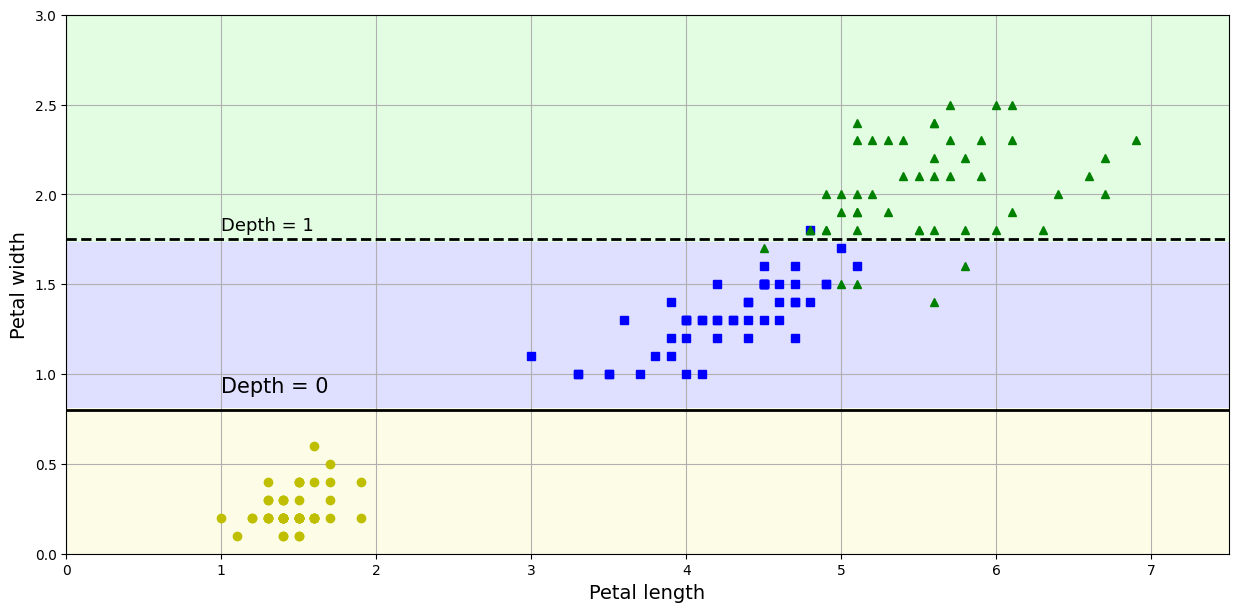

In [7]:
plt.figure(figsize=(15, 7))
plot_decision_boundary(clf=tree_clf_tweaked, X=X, y=y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'Depth = 0', fontsize=15)
plt.text(1.0, 1.80, 'Depth = 1', fontsize=13)
plt.grid(True)
plt.show()

Regularization using `min_samples_leaf`

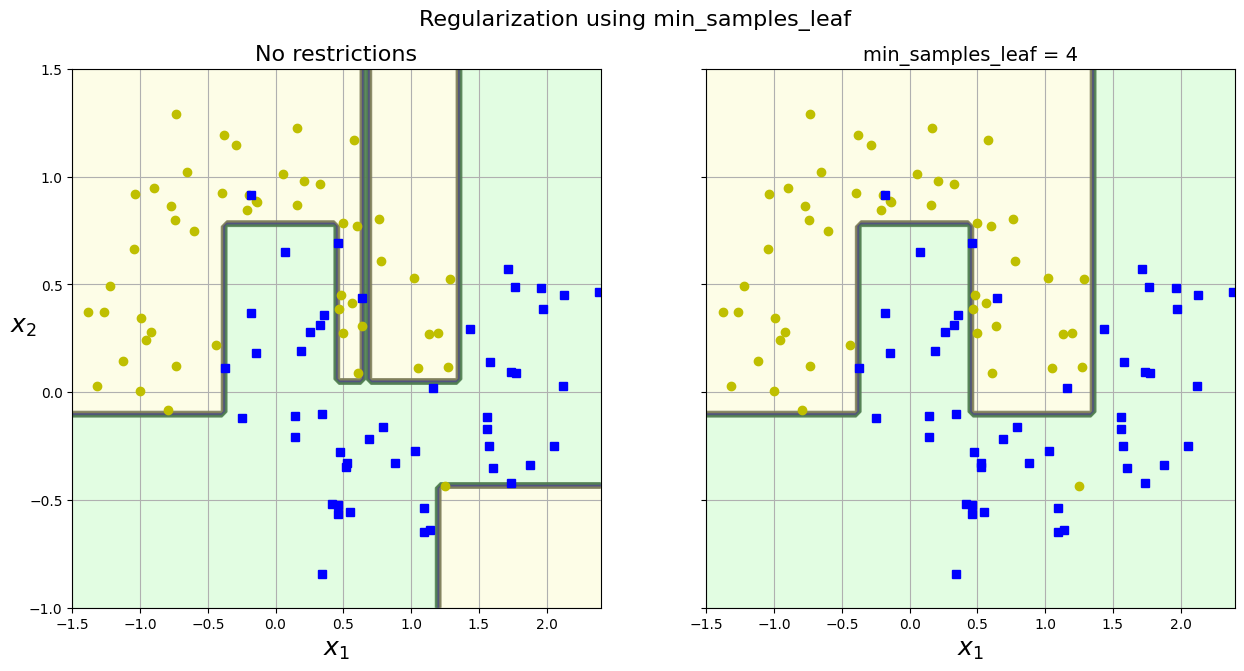

In [8]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(
    clf=deep_tree_clf1, X=Xm, y=ym, axes=[-1.5, 2.4, -1, 1.5], iris=False
)
plt.title('No restrictions', fontsize=16)
plt.sca(axes[1])

plot_decision_boundary(
    clf=deep_tree_clf2, X=Xm, y=ym, axes=[-1.5, 2.4, -1, 1.5], iris=False
)
plt.title(f"min_samples_leaf = {deep_tree_clf2.min_samples_leaf}", fontsize=14)
plt.ylabel('')

plt.figtext(
    0.5,
    0.95,
    'Regularization using min_samples_leaf',
    ha='center',
    va='center',
    fontsize=16,
)
plt.grid(True)
plt.show()

<h2>Regression</h2>

Prepare a simple quadratic training dataset + noise

In [9]:
np.random.seed(42)

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

`DecisionTreeRegressor` in scikit-learn is a regression algorithm using decision trees. It recursively splits data to predict continuous target variables. It's adept at capturing non-linear relationships, with hyperparameters like `max_depth` controlling complexity. Each leaf node predicts the average target value of its instances.

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

A Decision Tree for Regression

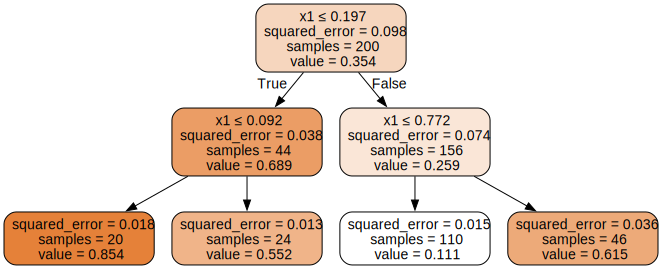

In [11]:
dot_data = export_graphviz(
    tree_reg,
    out_file=None,
    feature_names=['x1'],
    rounded=True,
    filled=True,
    special_characters=True,
)
display(Source(dot_data))

Predictions of two Decision Tree regression models

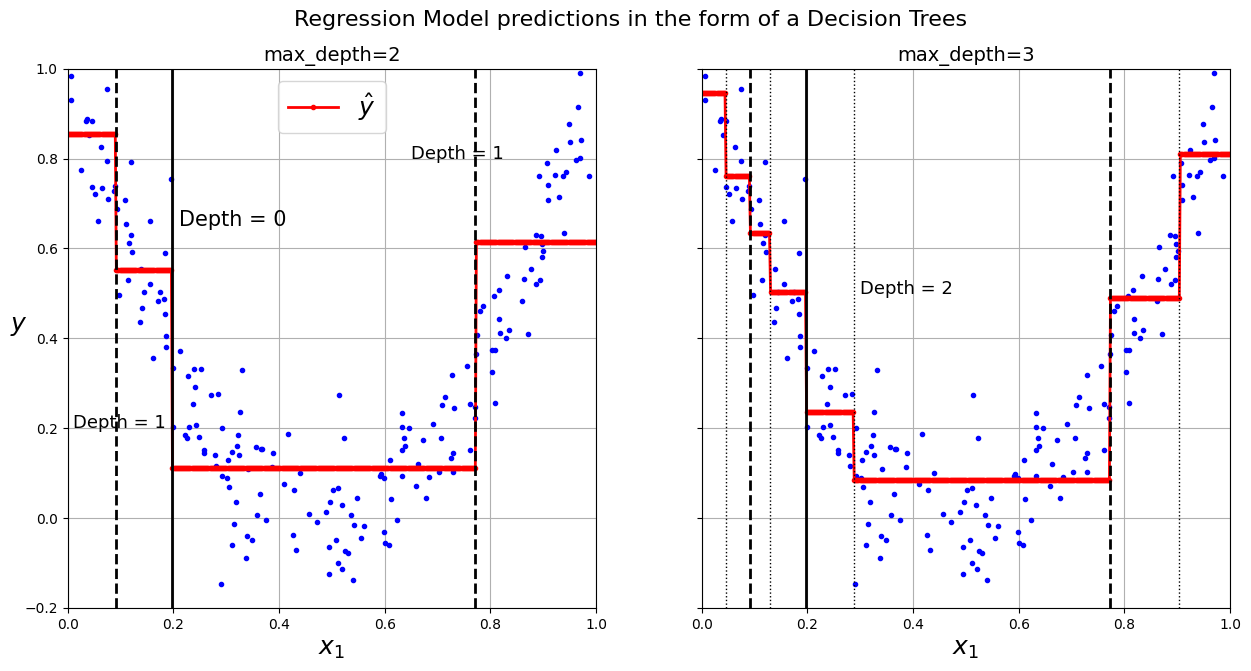

In [12]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel='$y$'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)

    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')
    plt.grid(True)


fig, axes = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg=tree_reg1, X=X, y=y)

for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.text(0.21, 0.65, 'Depth = 0', fontsize=15)
plt.text(0.01, 0.2, 'Depth = 1', fontsize=13)
plt.text(0.65, 0.8, 'Depth = 1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=2', fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg=tree_reg2, X=X, y=y, ylabel=None)

for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)

plt.text(0.3, 0.5, 'Depth = 2', fontsize=13)
plt.title('max_depth=3', fontsize=14)

plt.figtext(
    0.5,
    0.95,
    'Regression Model predictions in the form of a Decision Trees',
    ha='center',
    va='center',
    fontsize=16,
)
plt.show()

Regularizing a Decision Tree Regressor

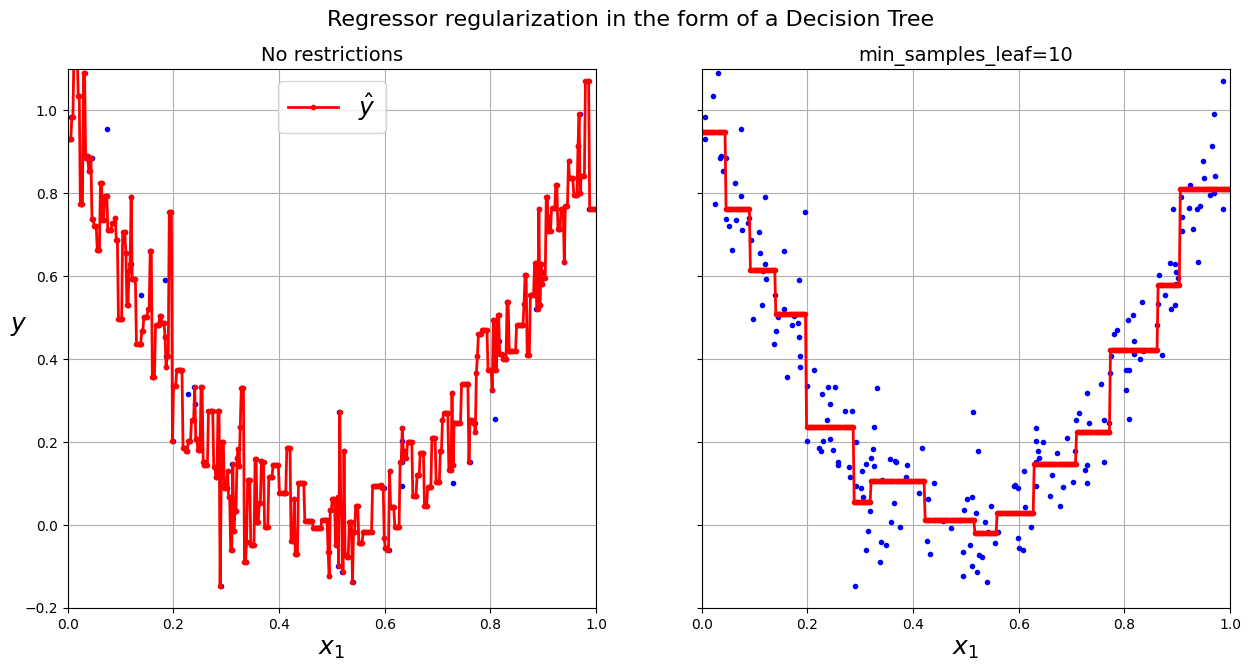

In [13]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('No restrictions', fontsize=14)
plt.grid(True)

plt.sca(axes[1])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}", fontsize=14)

plt.figtext(
    0.5,
    0.95,
    'Regressor regularization in the form of a Decision Tree',
    ha='center',
    va='center',
    fontsize=16,
)
plt.grid(True)
plt.show()